# Pandas

- Recommended Readings
    - [Python for Data Analysis](https://www.amazon.com/gp/product/1491957662/ref=as_li_tl_nodl?ie=UTF8&camp=1789&creative=9325&creativeASIN=1491957662&linkCode=as2&tag=ledoux-20&linkId=eff92247940c967299befaed855c580a)
    - [Python for Data Analysis GitHub](https://github.com/wesm/pydata-book)
    - [How to get sample datasets in Python](https://stackoverflow.com/questions/28417293/sample-datasets-in-pandas)
- Alternative methods in Python to deal with data exploration and manipulation
- These methods are to replicate what `dplyr` in R is capable of
- The `statsmodels` can download R datasets from https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib
%matplotlib inline

In [2]:
iris = sm.datasets.get_rdataset('iris').data
titanic = pd.read_csv('../../../Corpus/StatsDatasets/titanic-train.csv')

In [3]:
## Quick way to access R datasets
pd.DataFrame.head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
## DataFrame attributes
iris.shape
iris.columns
iris.index
iris.info()
iris.describe()
iris.dtypes # check column data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

## `dplyr` Key Verbs

- `filter()`
- `select()`
- `mutate()`
- `arrange()`
- `summarize()`
- `group_by()`

In [5]:
iris.isnull().sum()
iris['Species']=iris['Species'].astype('category')
iris.dtypes
#iris.value_counts(iris['Species']).plot.bar()

Sepal.Length     float64
Sepal.Width      float64
Petal.Length     float64
Petal.Width      float64
Species         category
dtype: object

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  
Sex    Pclass              
female 1       104.083337  
       2        26.241667  
       3        18.727977  
male   1       116.072900  
       2        25.659473  
       3        22.752523

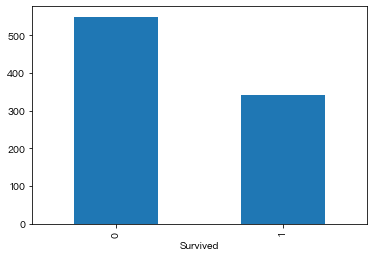

In [6]:
titanic.head()
titanic.value_counts(titanic['Survived']).plot.bar()
titanic.columns
titanic.groupby(['Sex','Pclass']).mean()
titanic[titanic['Age']<18].groupby(['Sex','Pclass']).mean()

###  `filter()`

In [7]:
## filter
iris[iris['Sepal.Length']>5]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
iris.query('`Sepal.Length`>5')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
iris[(iris['Sepal.Length']>5) & (iris['Sepal.Width']>4)]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


### `select()`

In [10]:
## select
iris[['Sepal.Length', 'Species']]

,Sepal.Length,Species
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa
...,...,...
145,6.7,virginica
146,6.3,virginica
147,6.5,virginica
148,6.2,virginica


In [11]:
## deselect columns
iris.drop(['Sepal.Length'], axis=1).head()

,Sepal.Width,Petal.Length,Petal.Width,Species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa


In [12]:
iris.filter(['Species','Sepal.Length'])

,Species,Sepal.Length
0,setosa,5.1
1,setosa,4.9
2,setosa,4.7
3,setosa,4.6
4,setosa,5.0
...,...,...
145,virginica,6.7
146,virginica,6.3
147,virginica,6.5
148,virginica,6.2


In [13]:
iris[['Species','Sepal.Length']]

,Species,Sepal.Length
0,setosa,5.1
1,setosa,4.9
2,setosa,4.7
3,setosa,4.6
4,setosa,5.0
...,...,...
145,virginica,6.7
146,virginica,6.3
147,virginica,6.5
148,virginica,6.2


In [14]:
## extract one particular column
sepal_length = iris['Sepal.Length']
type(sepal_length)

pandas.core.series.Series

### `mutate()`

In [15]:
## mutate
iris['Species_new'] = iris['Species'].apply(lambda x: len(x))
iris['Species_initial'] = iris['Species'].apply(lambda x: x[:2].upper())
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species_new,Species_initial
0,5.1,3.5,1.4,0.2,setosa,6,SE
1,4.9,3.0,1.4,0.2,setosa,6,SE
2,4.7,3.2,1.3,0.2,setosa,6,SE
3,4.6,3.1,1.5,0.2,setosa,6,SE
4,5.0,3.6,1.4,0.2,setosa,6,SE
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,9,VI
146,6.3,2.5,5.0,1.9,virginica,9,VI
147,6.5,3.0,5.2,2.0,virginica,9,VI
148,6.2,3.4,5.4,2.3,virginica,9,VI


In [16]:
## mutate alternative 2
iris.assign(Specias_initial2 = iris['Species'].apply(lambda x: x.upper()))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species_new,Species_initial,Specias_initial2
0,5.1,3.5,1.4,0.2,setosa,6,SE,SETOSA
1,4.9,3.0,1.4,0.2,setosa,6,SE,SETOSA
2,4.7,3.2,1.3,0.2,setosa,6,SE,SETOSA
3,4.6,3.1,1.5,0.2,setosa,6,SE,SETOSA
4,5.0,3.6,1.4,0.2,setosa,6,SE,SETOSA
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,9,VI,VIRGINICA
146,6.3,2.5,5.0,1.9,virginica,9,VI,VIRGINICA
147,6.5,3.0,5.2,2.0,virginica,9,VI,VIRGINICA
148,6.2,3.4,5.4,2.3,virginica,9,VI,VIRGINICA


### `group_by()` and `summarize()`

In [17]:
iris.groupby(by='Species').mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [18]:
iris.filter(['Species','Sepal.Length']).groupby('Species').agg({'Sepal.Length':['mean','count','std']})


Sepal.Length                
                   mean count       std
Species                                
setosa            5.006    50  0.352490
versicolor        5.936    50  0.516171
virginica         6.588    50  0.635880

### `rename()`


In [19]:
iris
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species',
       'Species_new', 'Species_initial'],
      dtype='object')

In [20]:
iris = iris.rename(columns={'Sepal.Length':'SLen'})
iris

,SLen,Sepal.Width,Petal.Length,Petal.Width,Species,Species_new,Species_initial
0,5.1,3.5,1.4,0.2,setosa,6,SE
1,4.9,3.0,1.4,0.2,setosa,6,SE
2,4.7,3.2,1.3,0.2,setosa,6,SE
3,4.6,3.1,1.5,0.2,setosa,6,SE
4,5.0,3.6,1.4,0.2,setosa,6,SE
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,9,VI
146,6.3,2.5,5.0,1.9,virginica,9,VI
147,6.5,3.0,5.2,2.0,virginica,9,VI
148,6.2,3.4,5.4,2.3,virginica,9,VI
